In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, Graph, START, END
from langgraph.graph.message import add_messages
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
import os

In [2]:
load_dotenv("/home/kamal/.env")

True

In [3]:
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash",api_key=os.getenv("GOOGLE_API_KEY"))

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [5]:
graph_builder = StateGraph(State)

In [6]:
graph_builder.add_node("llmChatbot",chatbot)

graph_builder.add_edge(START, "llmChatbot")
graph_builder.add_edge("llmChatbot",END)

In [7]:
graph=graph_builder.compile()

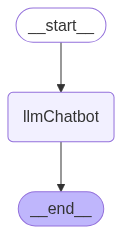

In [8]:
graph

In [9]:
graph.invoke({"messages": [{"role": "user", "content": "Hello, how are you?"}]})

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='9af88bf8-fb19-45ca-ad8d-b1e5ae9e7a60'),
  AIMessage(content="Hello! I'm doing well, thank you for asking. As an AI, I don't experience feelings, but I'm ready and available to assist you.\n\nHow are you doing today? And how can I help you?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--513cfa14-94e5-4b07-89f7-e3e1b205c58d-0', usage_metadata={'input_tokens': 7, 'output_tokens': 49, 'total_tokens': 86, 'input_token_details': {'cache_read': 0}})]}